## This file will be used to produce heatmap

Last edit: 01.10.2022

### Import libraries

In [1]:
from model_first_paper import *
import matplotlib.pyplot as plt
import seaborn as sns

import Tools as t

### Setup the model and input the parameters

In [2]:
map_width = 50
map_height = 50
moore = False

#Number of commuters, taxis, and noises
num_of_motorist = [30,25,10]

#With inventory
inv_size = 24
cp_size = int(np.ceil(inv_size/3))

#Without inventory
#cp_size = 10

model = switching_model(num_of_motorist,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="less")
#Dalam menit
days = 30
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

4
(12, 12)
(12, 37)
(37, 12)
(37, 37)


### Alive agents

In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
43195,65,7
43196,65,7
43197,65,7
43198,65,7
43199,65,7


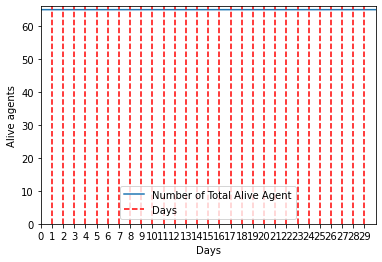

In [4]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,sum(num_of_motorist) + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

### We will extract the information from all of the agents

In [5]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive
Step AgentID                            
0    0           None  2375.956747  None
     1           None  1152.736520  None
     2           None   738.158317  None
     3           None  1149.819530  None
     4           None  2178.388622  None

### Retrieve the motorists

In [6]:
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]

#print jumlah baris
print(len(motorist_alive_position.index))

2808000


In [7]:
sample_257 = motorist_alive_position.loc[motorist_alive_position.index.get_level_values('AgentID') == 257].tolist()

### List all of the positions of the alive motorists

In [8]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

2808000


Text(33.0, 0.5, 'y')

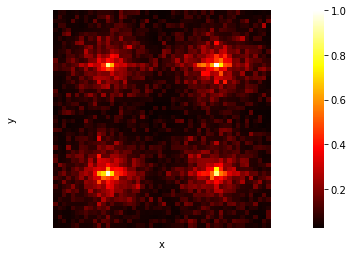

In [9]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data, cmap = 'hot')
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')

### The heatmap is still not good enough, let's clean the data a little bit

In [10]:
# We'll take the active positions of the drivers, the drivers should also be alive
active_pos = [] # We'll store the positions here

for id in motorist_id:
    dirty_pos = motorist_alive_position.loc[motorist_alive_position.index.get_level_values('AgentID') == id].tolist()
    clean_pos = t.clean_positions(dirty_pos)
    #print(t.clean_positions(dirty_pos))
    active_pos = active_pos + clean_pos


Text(33.0, 0.5, 'y')

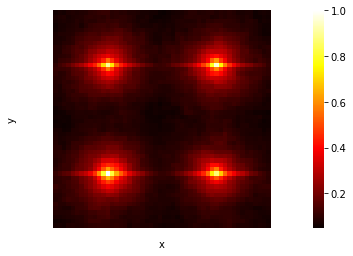

In [11]:
heatmap_data_clean = np.zeros((model.grid.width, model.grid.height))
for coor in active_pos:
    x,y = coor
    heatmap_data_clean[x,y] +=1

most_frequent_clean = np.amax(heatmap_data_clean)
norm_heatmap_data_clean = heatmap_data_clean/most_frequent_clean

ax = sns.heatmap(norm_heatmap_data_clean, cmap = 'hot')
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')